In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import folium

In [3]:
data_path='../data'
sns.set(rc={'figure.figsize':(20,6)})

In [4]:
df=pd.read_csv(os.path.join(data_path,'cleaned_data.csv'))
df.head(2)

,event_id,event_date,year,event_type,sub_event_type,actor1,actor2,inter2,civilian_targeting,region,district,location,latitude,longitude,source,fatalities,population
0,156190,12 April 2024,2024,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,0,No,Kherson,Khersonskyi,Antonivka,46.6799,32.6925,Unian,0,11352.0
1,156193,12 April 2024,2024,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,0,No,Zaporizhia,Polohivskyi,Bilohiria,47.5268,36.0004,Ministry of Defence of Ukraine,0,282.0


In [5]:
print(df['sub_event_type'].unique())
counts = df['sub_event_type'].value_counts()
print(counts)

['Shelling/artillery/missile attack' 'Air/drone strike'
 'Remote explosive/landmine/IED' 'Abduction/forced disappearance' 'Attack'
 'Grenade' 'Sexual violence' 'Suicide bomb' 'Mob violence'
 'Violent demonstration']
sub_event_type
Shelling/artillery/missile attack    63913
Air/drone strike                     11235
Remote explosive/landmine/IED         1258
Attack                                 519
Abduction/forced disappearance         379
Sexual violence                         80
Grenade                                 10
Mob violence                             3
Suicide bomb                             2
Violent demonstration                    1
Name: count, dtype: int64


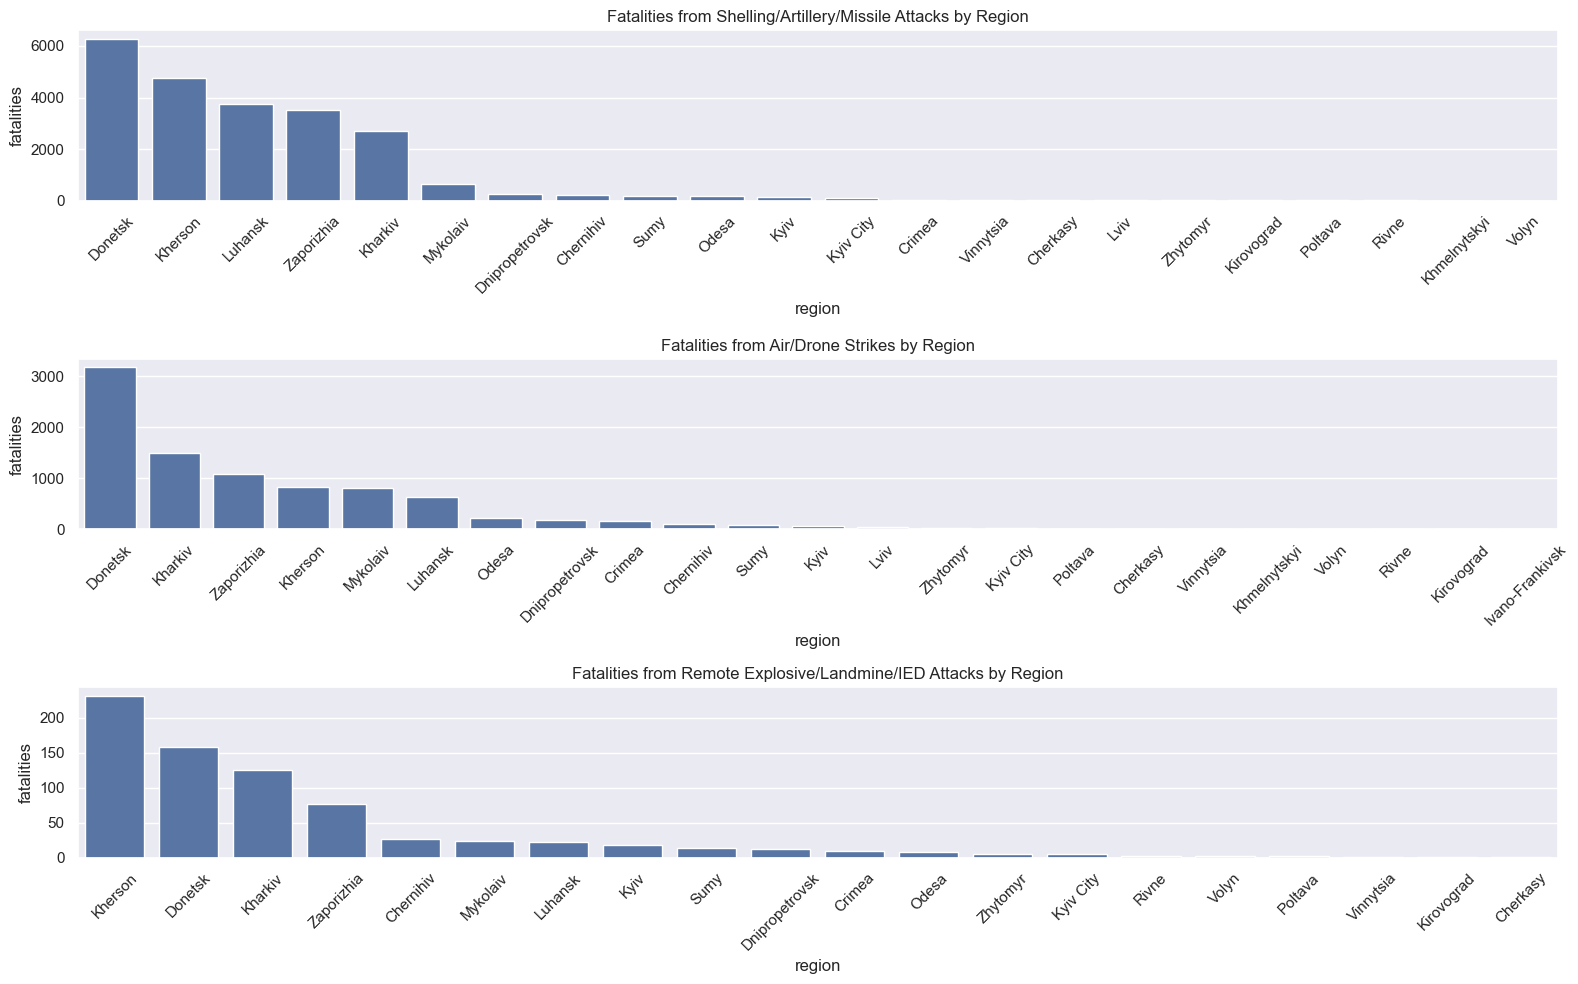

In [6]:
# Filtering data for specific types of events
shelling_data = df[df['sub_event_type'] == 'Shelling/artillery/missile attack']
air_strike_data = df[df['sub_event_type'] == 'Air/drone strike']
explosive_data = df[df['sub_event_type'] == 'Remote explosive/landmine/IED']

# Grouping data by region and calculating total fatalities for each region
shelling_fatalities = shelling_data.groupby('region')['fatalities'].sum().reset_index()
air_strike_fatalities = air_strike_data.groupby('region')['fatalities'].sum().reset_index()
explosive_fatalities = explosive_data.groupby('region')['fatalities'].sum().reset_index()

# Filtering regions with non-zero fatalities
shelling_fatalities = shelling_fatalities[shelling_fatalities['fatalities'] > 0]
air_strike_fatalities = air_strike_fatalities[air_strike_fatalities['fatalities'] > 0]
explosive_fatalities = explosive_fatalities[explosive_fatalities['fatalities'] > 0]

# Sorting data by number of fatalities in descending order
shelling_fatalities = shelling_fatalities.sort_values(by='fatalities', ascending=False)
air_strike_fatalities = air_strike_fatalities.sort_values(by='fatalities', ascending=False)
explosive_fatalities = explosive_fatalities.sort_values(by='fatalities', ascending=False)

# Plotting graphs
plt.figure(figsize=(16, 10))
plt.subplot(3, 1, 1)
sns.barplot(x='region', y='fatalities', data=shelling_fatalities)
plt.title('Fatalities from Shelling/Artillery/Missile Attacks by Region')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.barplot(x='region', y='fatalities', data=air_strike_fatalities)
plt.title('Fatalities from Air/Drone Strikes by Region')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.barplot(x='region', y='fatalities', data=explosive_fatalities)
plt.title('Fatalities from Remote Explosive/Landmine/IED Attacks by Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



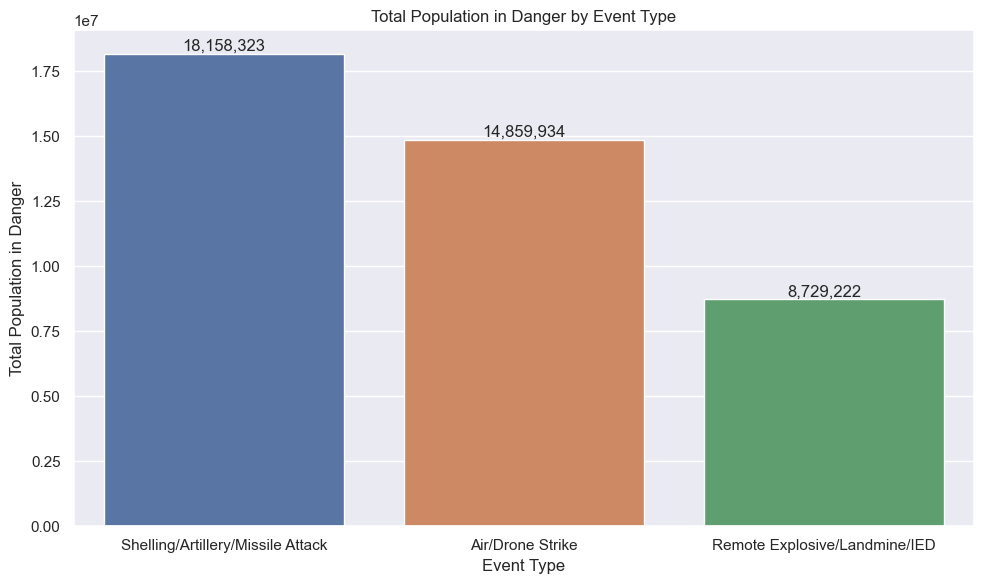

In [7]:
# Removing duplicates for each type of event
shelling_data_unique = shelling_data.drop_duplicates(subset=['location'])
air_strike_data_unique = air_strike_data.drop_duplicates(subset=['location'])
explosive_data_unique = explosive_data.drop_duplicates(subset=['location'])

# Calculating the total population at risk for each type of event
shelling_population_sum = shelling_data_unique['population'].sum()
air_strike_population_sum = air_strike_data_unique['population'].sum()
explosive_population_sum = explosive_data_unique['population'].sum()

# Creating a dataframe for convenient plotting
summary_data = pd.DataFrame({
    'Event Type': ['Shelling/Artillery/Missile Attack', 'Air/Drone Strike', 'Remote Explosive/Landmine/IED'],
    'Population in Danger': [shelling_population_sum, air_strike_population_sum, explosive_population_sum]
})

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Event Type', y='Population in Danger', data=summary_data, hue='Event Type', dodge=False, legend=False)

# Adding text labels above each bar
for index, row in summary_data.iterrows():
    plt.text(index, row['Population in Danger'], f"{int(row['Population in Danger']):,}", ha='center', va='bottom')

plt.title('Total Population in Danger by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Total Population in Danger')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()




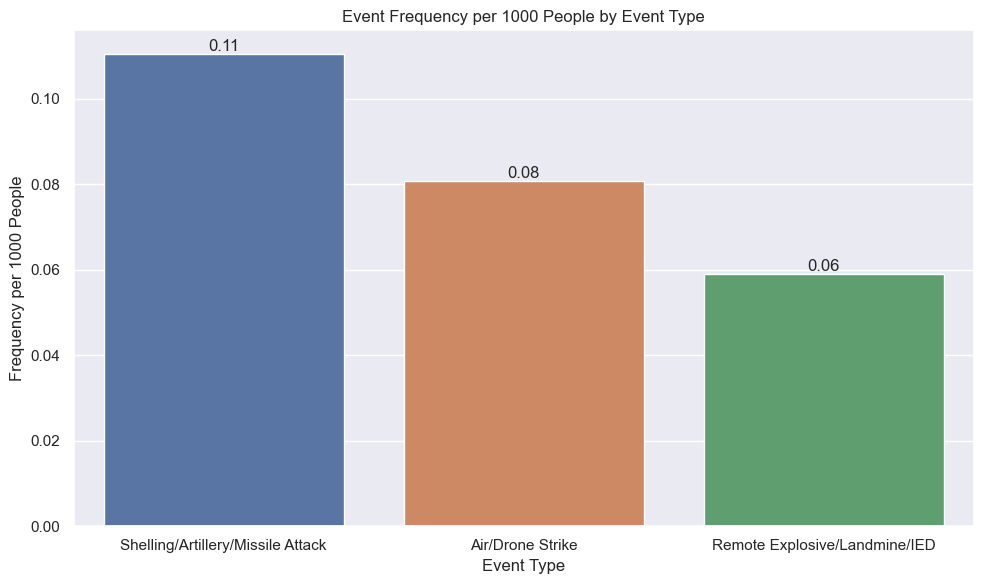

In [8]:
# Calculating the frequency of events per 1000 people
shelling_frequency_per_1000 = len(shelling_data_unique) / (shelling_population_sum / 1000)
air_strike_frequency_per_1000 = len(air_strike_data_unique) / (air_strike_population_sum / 1000)
explosive_frequency_per_1000 = len(explosive_data_unique) / (explosive_population_sum / 1000)

# Creating a dataframe for convenient plotting
frequency_data = pd.DataFrame({
    'Event Type': ['Shelling/Artillery/Missile Attack', 'Air/Drone Strike', 'Remote Explosive/Landmine/IED'],
    'Frequency per 1000 People': [shelling_frequency_per_1000, air_strike_frequency_per_1000, explosive_frequency_per_1000]
})

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Event Type', y='Frequency per 1000 People', data=frequency_data, hue='Event Type', dodge=False)

# Adding text labels above each bar
for index, row in frequency_data.iterrows():
    plt.text(index, row['Frequency per 1000 People'], f"{row['Frequency per 1000 People']:.2f}", ha='center', va='bottom')

plt.title('Event Frequency per 1000 People by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Frequency per 1000 People')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()



Analyzing these data from the conflict in Ukraine, the following conclusions can be drawn:

1. Shelling/Artillery/Missile Attack: The high frequency of these events may indicate active military engagements, including the use of artillery, rockets, and mortars. This reflects the intensity of combat in certain regions where the conflict is active.

2. Air/Drone Strike: The frequency of airstrikes and drone attacks is also significant, suggesting the involvement of military aviation in the conflict. This could result from aerial support or operations to destroy important enemy targets.

3. Remote Explosive/Landmine/IED: Despite lower frequency, the presence of explosive devices and mines poses a serious threat to the lives and safety of civilians. They may be used for terrorist acts or as traps along roads.

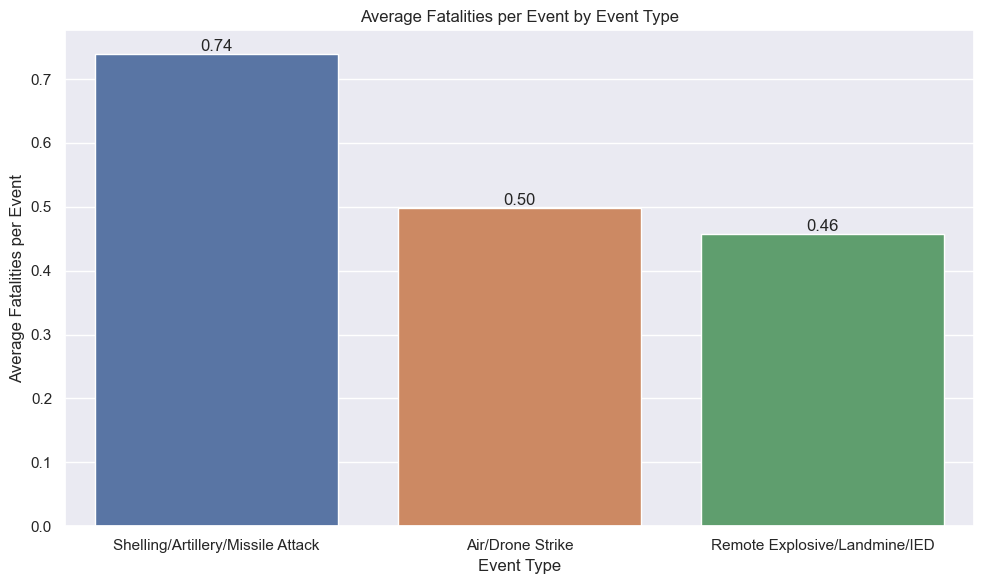

In [9]:
# Calculating the average number of fatalities per event
shelling_avg_fatalities = shelling_data_unique['fatalities'].mean()
air_strike_avg_fatalities = air_strike_data_unique['fatalities'].mean()
explosive_avg_fatalities = explosive_data_unique['fatalities'].mean()

# Creating a dataframe for convenient plotting
fatalities_data = pd.DataFrame({
    'Event Type': ['Shelling/Artillery/Missile Attack', 'Air/Drone Strike', 'Remote Explosive/Landmine/IED'],
    'Average Fatalities per Event': [shelling_avg_fatalities, air_strike_avg_fatalities, explosive_avg_fatalities]
})

# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Event Type', y='Average Fatalities per Event', data=fatalities_data, hue='Event Type', dodge=False)

# Adding text labels above each bar
for index, row in fatalities_data.iterrows():
    plt.text(index, row['Average Fatalities per Event'], f"{row['Average Fatalities per Event']:.2f}", ha='center', va='bottom')

plt.title('Average Fatalities per Event by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Fatalities per Event')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


1. Shelling/Artillery/Missile Attack: The high average number of fatalities per event during artillery shelling and missile attacks indicates the severity of these assaults and their devastating impact on the lives of civilians. These events result in serious human tragedies and material losses that are difficult to recover from.

2. Air/Drone Strike: The moderate but significant average number of fatalities per event resulting from air and drone strikes highlights the risk to the lives of civilian populations, leading to a large number of casualties among civilians and infrastructure.

3. Remote Explosive/Landmine/IED: Although the average number of fatalities per event for explosive devices, mines, and IEDs may seem lower, it still poses a serious risk to the safety of civilian populations. These traps already result in serious consequences for civilian populations.

Total days: 778
Shelling events per day: 2.5784
Air strike events per day: 1.5437
Explosive events per day: 0.6632


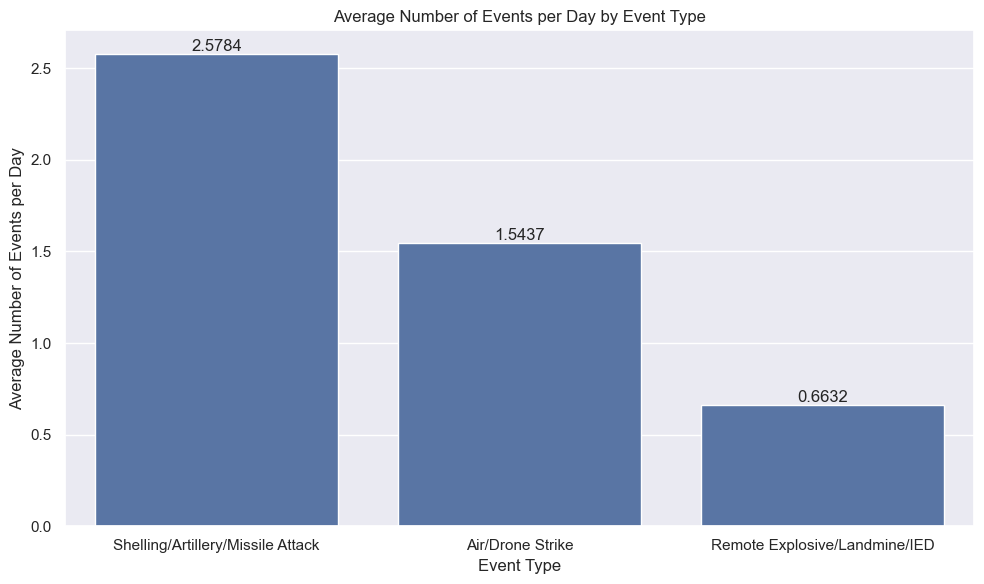

In [10]:
# Converting 'event_date' to date format
df['event_date'] = pd.to_datetime(df['event_date'])

# Determining the total number of days in the period
total_days = (df['event_date'].max() - df['event_date'].min()).days

# Calculating the average number of events per day
shelling_events_per_day = len(shelling_data_unique) / total_days
air_strike_events_per_day = len(air_strike_data_unique) / total_days
explosive_events_per_day = len(explosive_data_unique) / total_days

# Checking the results
print(f"Total days: {total_days}")
print(f"Shelling events per day: {shelling_events_per_day:.4f}")
print(f"Air strike events per day: {air_strike_events_per_day:.4f}")
print(f"Explosive events per day: {explosive_events_per_day:.4f}")

# Creating a DataFrame with the average values of events per day
events_per_day_data = pd.DataFrame({
    'Event Type': ['Shelling/Artillery/Missile Attack', 'Air/Drone Strike', 'Remote Explosive/Landmine/IED'],
    'Events per Day': [shelling_events_per_day, air_strike_events_per_day, explosive_events_per_day]
})

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Event Type', y='Events per Day', data=events_per_day_data, dodge=False)

# Adding text labels
for index, row in events_per_day_data.iterrows():
    plt.text(index, row['Events per Day'], f"{row['Events per Day']:.4f}", ha='center', va='bottom')

plt.title('Average Number of Events per Day by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Number of Events per Day')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()




1. Shelling/Artillery/Missile Attack: With an average of approximately 2.5784 events per day, shelling and artillery attacks occur frequently throughout the analyzed period. This indicates sustained military activity involving the use of heavy weaponry, posing a significant threat to civilian populations and infrastructure.

2. Air/Drone Strike: The average of approximately 1.5437 air and drone strikes per day suggests a consistent level of aerial military operations. These strikes may be targeting specific military objectives or strategic locations, potentially leading to casualties and damage to civilian areas.

3. Remote Explosive/Landmine/IED: With an average of approximately 0.6632 events per day, incidents involving remote explosive devices, landmines, and IEDs occur less frequently compared to shelling and air strikes. However, they still represent a notable threat, especially considering the indiscriminate nature of these explosives and their potential impact on civilian populations.

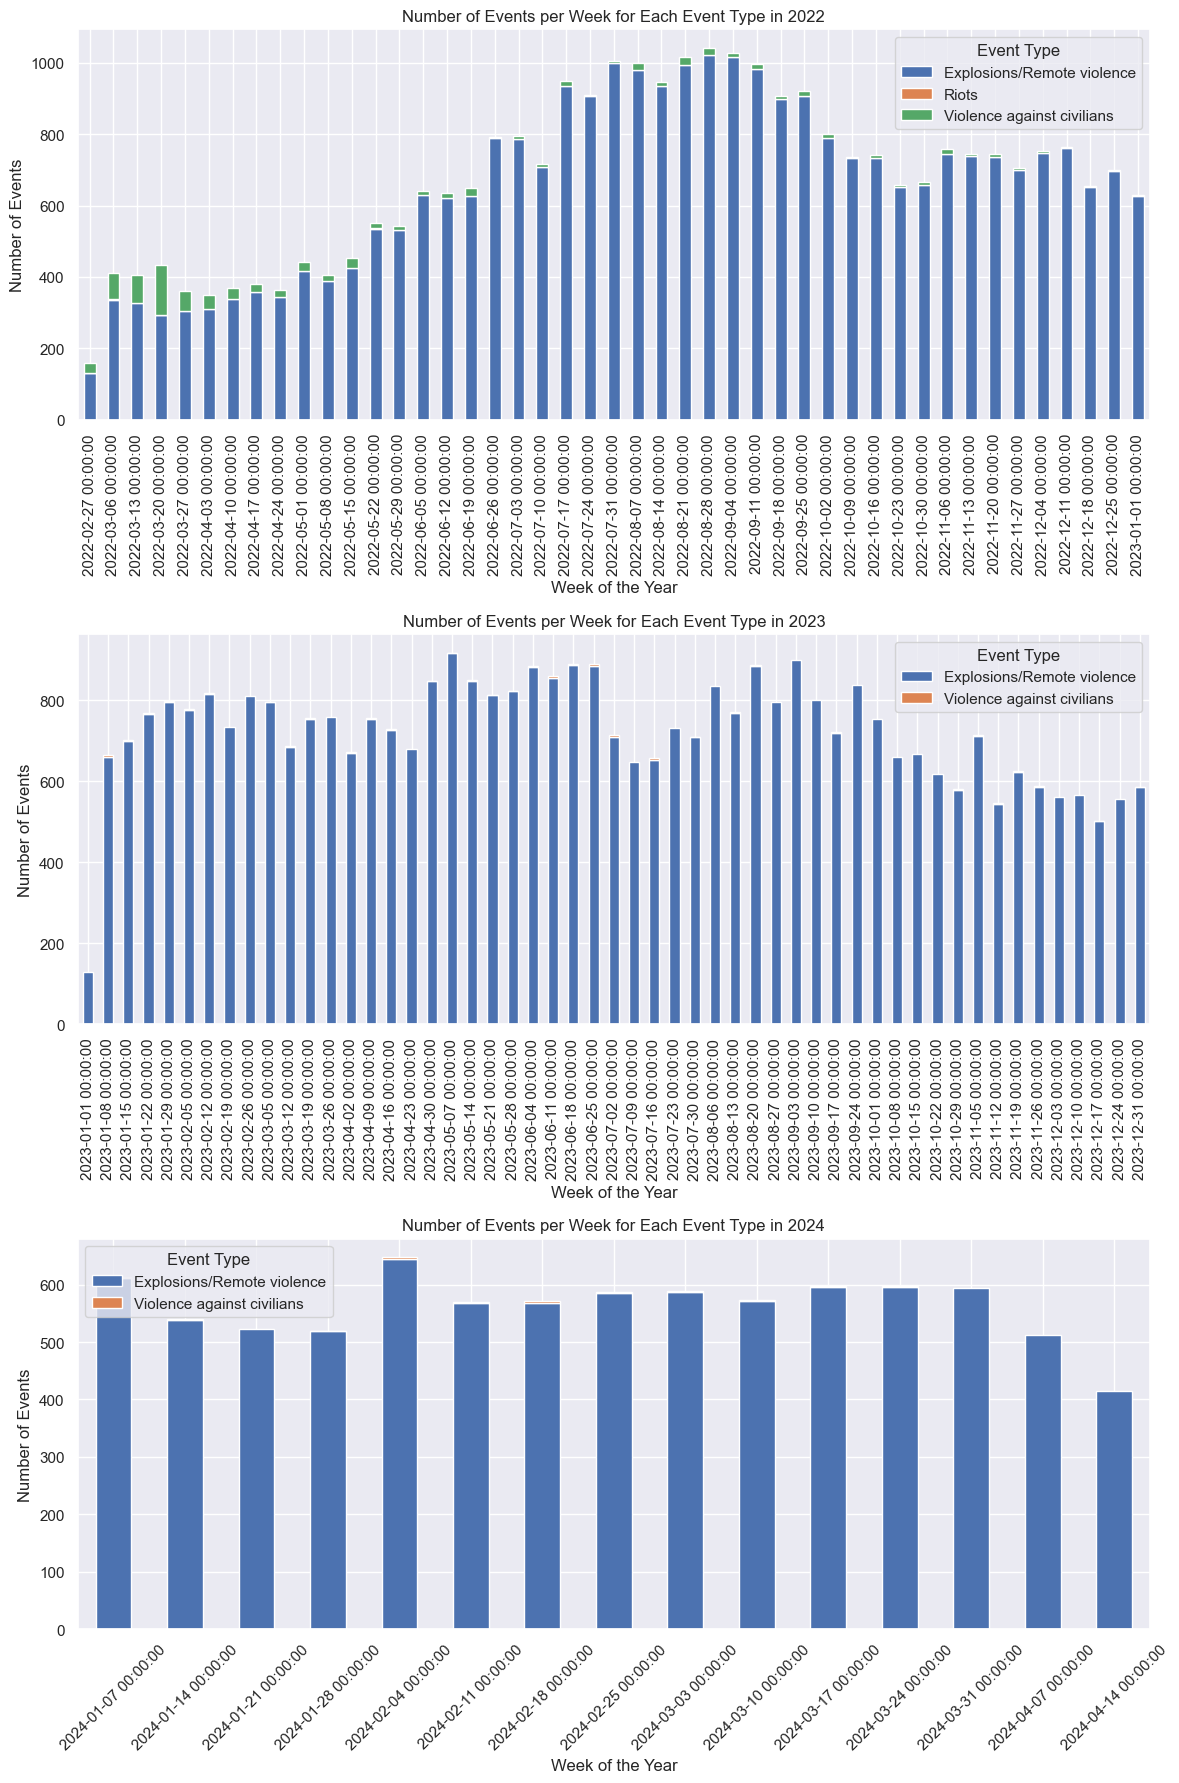

In [11]:
data = df.copy()

# Converting the 'event_date' column to date format
data['event_date'] = pd.to_datetime(data['event_date'])

# Extracting the year from the 'event_date' column
data['year'] = data['event_date'].dt.year

# Selecting data for the years 2022, 2023, and 2024
data_2022 = data[data['year'] == 2022]
data_2023 = data[data['year'] == 2023]
data_2024 = data[data['year'] == 2024]

# Creating a subplot grid
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=False)

# Plotting for each year
for ax, data_year, year in zip(axs, [data_2022, data_2023, data_2024], [2022, 2023, 2024]):
    # Grouping by event_type and creating a weekly time series
    weekly_events = data_year.groupby([pd.Grouper(key='event_date', freq='W'), 'event_type']).size().unstack(fill_value=0)
    
    # Plotting for each event type
    weekly_events.plot(kind='bar', stacked=True, ax=ax)
    
    # Setting plot appearance
    ax.set_ylabel('Number of Events')
    ax.set_title(f'Number of Events per Week for Each Event Type in {year}')
    ax.set_xlabel('Week of the Year')
    ax.legend(title='Event Type')

    # Displaying the plot
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


